In [1]:
%pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.4 MB/s eta 0:00:00


In [12]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt #type: ignore
from deap import base, creator, tools, algorithms #type: ignore

In [28]:
# Number of locations and vehicles
num_locations = 33
locations = [(random.randint(0, 150), random.randint(0, 150)) for _ in range(num_locations)]  # random (x, y) coordinates
depot = (75, 75)
num_vehicles = 3

In [29]:
# Genetic Algorithm
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [30]:
# Set the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [31]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculates total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [32]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [33]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

gen	nevals	avg    	min    
0  	300   	1544.25	1.57424
1  	236   	1499.37	1.57424
2  	225   	1457.85	7.13228
3  	226   	1445.4 	7.13228
4  	238   	1452.69	5.95215
5  	234   	1438.56	14.2286
6  	246   	1424.99	1.87338
7  	236   	1424.38	10.4062
8  	225   	1410.86	10.7968
9  	224   	1397.49	5.83586
10 	222   	1390.1 	4.7807 
11 	227   	1390.76	13.0009
12 	231   	1393.55	14.4626
13 	241   	1379.1 	4.53934
14 	222   	1371.11	4.53934
15 	245   	1375.53	4.53934
16 	223   	1380.86	2.27459
17 	243   	1376   	4.53934
18 	226   	1380.79	4.53934
19 	231   	1368.93	4.53934
20 	241   	1363.94	2.34998
21 	227   	1347.6 	1.63588
22 	230   	1337.78	4.53934
23 	229   	1329.19	4.53934
24 	227   	1341.58	4.83766
25 	235   	1327.46	4.31404
26 	238   	1317.09	7.49493
27 	233   	1308.14	8.09419
28 	224   	1291.71	5.6304 
29 	199   	1257.41	6.4621 
30 	228   	1265.49	5.6616 
31 	248   	1275.62	7.36737
32 	239   	1252.76	1.90117
33 	233   	1189.3 	12.7439
34 	237   	1129.5 	3.77623
35 	236   	1100.26	15.2379
3

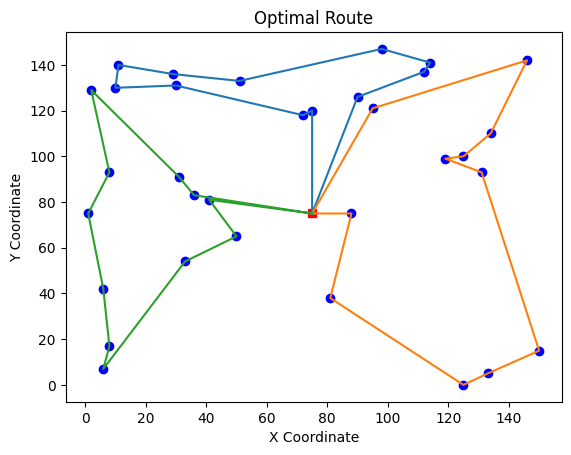

In [34]:
if __name__ == "__main__":
    main()